#### Irregular data: interval between the observations is not fixed.
#### On the other hand, most modeling techniques require a regular time series.

#### Possible solution: aggregation of the data at a particular unit of time.

In [65]:
# importing some irregular data file
irregular_sensor = read.csv('irregular-sensor.csv', header = FALSE, sep = ',')
irregular_sensor # we see irregularity of date and time - not fixed intervals between observations
# we will regularize the data set by making it daily - there has to be at least one observation a day
# but, it is not too bad if we have very few missing data, that we can later impute
# for too many missing data, we should change the time window from daily to maybe weekly, monthly, etc.

V1,V2
05/16/17 10:34 AM,334.5
05/17/17 03:23 PM,385.9
05/17/17 08:45 PM,492.5
05/18/17 03:23 AM,325.8
05/18/17 12:34 PM,372.6
05/19/17 11:34 AM,345.2
05/20/17 12:34 PM,419.5
05/21/17 12:34 PM,352.9
05/22/17 05:45 PM,351.9
05/22/17 06:02 AM,392.5


In [66]:
class(irregular_sensor$V1) # does not recognize date and time format
class(irregular_sensor$V2)

[1] "factor"

[1] "numeric"

In [72]:
# we will need a library for irregular time series
library('zoo')

### Method 1: Separating the date and time components

In [73]:
# as we want to aggregate by date, ignoring time, we should separate date and time data in column V1
library(tidyr) # for function separate
irreg_split = separate(irregular_sensor, col = V1, 
                    into = c('date', 'time'),
                    sep = 8, remove = T) 
# sep: positive nr is for separating from the left side, and negative for separating from the right side
# 'remove = T' for removing the initial column V1
head(irreg_split)

date,time,V2
05/16/17,10:34 AM,334.5
05/17/17,03:23 PM,385.9
05/17/17,08:45 PM,492.5
05/18/17,03:23 AM,325.8
05/18/17,12:34 PM,372.6
05/19/17,11:34 AM,345.2


In [74]:
# converting text date column into a date/time format
# ?strptime => Date-time Conversion Functions to and from Character
sensor_date = strptime(irreg_split$date, '%m/%d/%y')
class(sensor_date) # POSIXlt class with components of time and time zone
head(sensor_date)

[1] "POSIXlt" "POSIXt"

[1] "2017-05-16 CEST" "2017-05-17 CEST" "2017-05-17 CEST" "2017-05-18 CEST"
[5] "2017-05-18 CEST" "2017-05-19 CEST"

In [99]:
# creating a data.frame with info that we need: date in a date/time format, and measurement
irregts_df = data.frame(date = as.Date(sensor_date), # converting sensor_date to a proper date format (Date class)
                         measurement = irregular_sensor$V2)
# as I see, we did not have to convert POSIXt to Date class
class(irregts_df[, c('date')])
head(irregts_df)

[1] "Date"

date,measurement
2017-05-16,334.5
2017-05-17,385.9
2017-05-17,492.5
2017-05-18,325.8
2017-05-18,372.6
2017-05-19,345.2


In [100]:
# converting irregts_df to a zoo object, which enables aggregation
irreg_dates = zoo(irregts_df$measurement,
                  order.by = irregts_df$date)
class(irreg_dates) # allows irregular time stamp
length(irreg_dates)
head(irreg_dates)

Warning message in zoo(irregts_df$measurement, order.by = irregts_df$date):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"

[1] "zoo"

[1] 25

Warning message in zoo(rval[i], index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"

2017-05-16 2017-05-17 2017-05-17 2017-05-18 2017-05-18 2017-05-19 
     334.5      385.9      492.5      325.8      372.6      345.2 

In [101]:
# regularizing with aggregate - which gives a mean of each day, and we have exactly one observation a day
ag_irreg_dates = aggregate(irreg_dates, as.Date, mean)
class(ag_irreg_dates)
length(ag_irreg_dates)
head(ag_irreg_dates)

[1] "zoo"

[1] 16

2017-05-16 2017-05-17 2017-05-18 2017-05-19 2017-05-20 2017-05-21 
     334.5      439.2      349.2      345.2      419.5      352.9 

### Method 2: Keeping the date and time components as a unit

In [102]:
sensor_date1 = strptime(irregular_sensor$V1,
                        '%m/%d/%y %I:%M %p')
class(sensor_date1) # POSIXlt class as well
head(sensor_date1)

[1] "POSIXlt" "POSIXt"

[1] "2017-05-16 10:34:00 CEST" "2017-05-17 15:23:00 CEST"
[3] "2017-05-17 20:45:00 CEST" "2017-05-18 03:23:00 CEST"
[5] "2017-05-18 12:34:00 CEST" "2017-05-19 11:34:00 CEST"

In [103]:
# creating the zoo object
irreg_dates1 = zoo(irregular_sensor$V2, 
                   order.by = sensor_date1)
class(irreg_dates1)
length(irreg_dates)
head(irreg_dates1)

[1] "zoo"

[1] 25

2017-05-16 10:34:00 2017-05-17 15:23:00 2017-05-17 20:45:00 2017-05-18 03:23:00 
              334.5               385.9               492.5               325.8 
2017-05-18 12:34:00 2017-05-19 11:34:00 
              372.6               345.2 

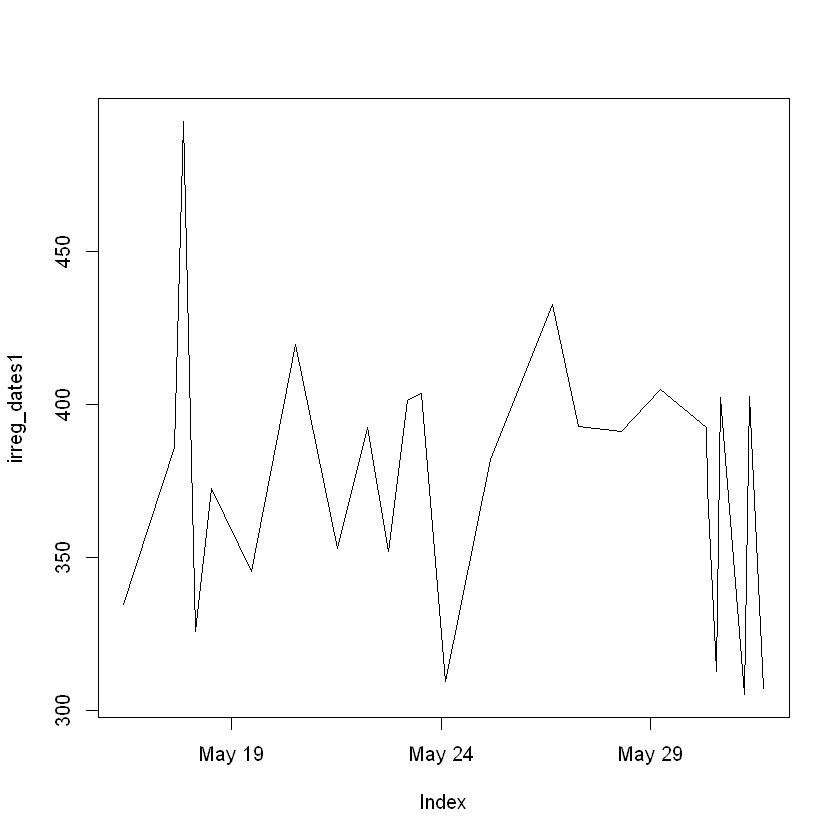

In [104]:
plot(irreg_dates1)

In [112]:
# regularizing with aggregate
ag_irreg_dates1 = aggregate(irreg_dates1, as.Date, mean)
class(ag_irreg_dates1)
length(ag_irreg_dates1)
head(ag_irreg_dates1)

[1] "zoo"

[1] 16

2017-05-16 2017-05-17 2017-05-18 2017-05-19 2017-05-20 2017-05-21 
     334.5      439.2      349.2      345.2      419.5      352.9 

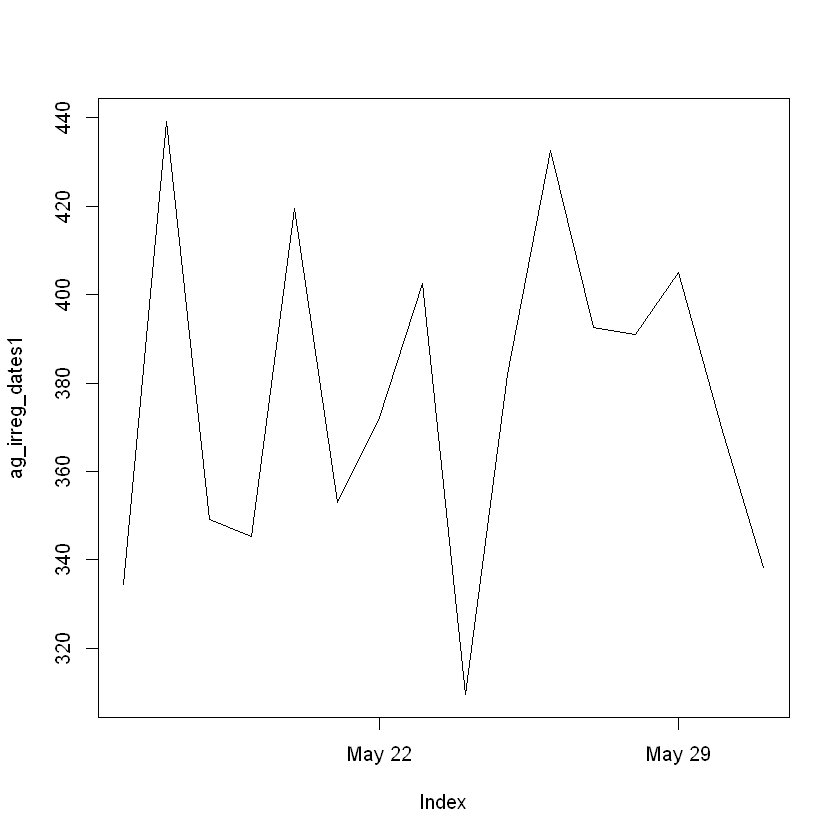

In [107]:
plot(ag_irreg_dates1)

In [109]:
# converting to a standard ts, the days start at 1
myts = ts(ag_irreg_dates1) 
class(myts)
head(myts)

[1] "ts"

[1] 334.5 439.2 349.2 345.2 419.5 352.9

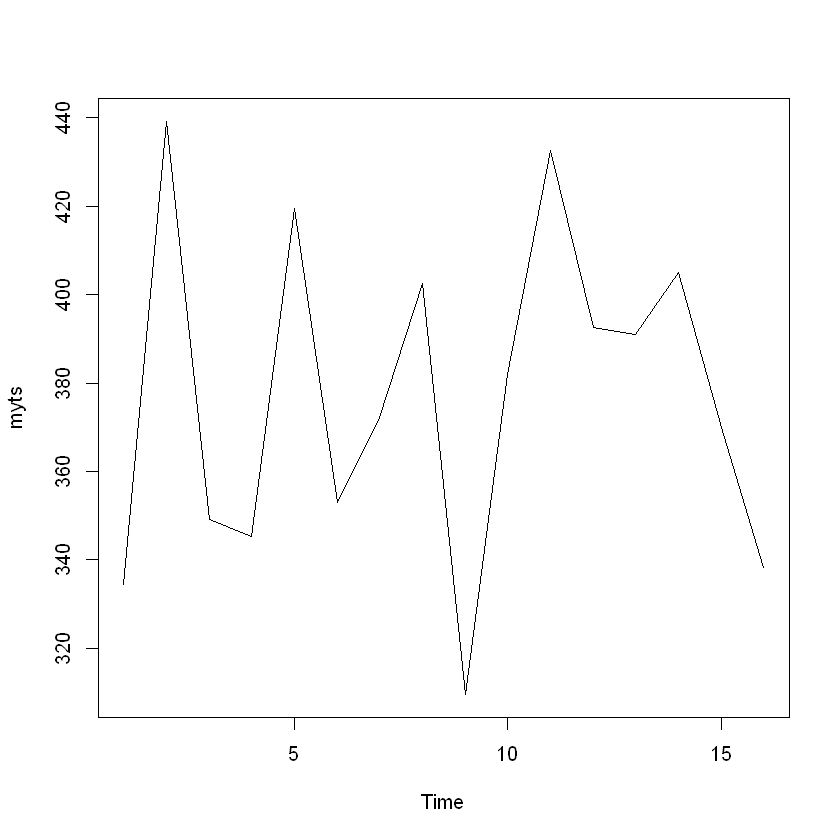

In [110]:
plot(myts)